# Линейна регресия

В тази глава ще научим какво представлява линейната регресия и ще видим как работи тя като метод за машинно самообучение с помоща на ценовата функция и алгоритъмът за градиентно спускане.

Линейната регресия преставлява метод за построяване на връзка между множество от независими променливи $x_1, x_2, ..., x_n$ и зависима променлива $y$. Използвайки линейна регресия с една независима променлива ще построим прост предсказващ модел. Предположението, което правим е, че връзката между зависимата и независимата променлива е линейна.

Таблицата по-долу съдържа записи за наеми на имоти, заедно с някои техни параметри, като **размер**, **етаж** и **енергиен клас**. Параметрите на жилището са независимите променливи, а **наем** е зависима променлива, която искаме да предвидим. Тъй като разглеждаме линейна регресия с една променлива, като независима променлива за нашият модел ще изпозваме **размер**.



| Размер (кв. м.) | Етаж | Енергиен клас | Наем |
| :-----|-----|-----|-----|
| 500 | 4 | C | 320 |
| 550 | 7 | A | 380 |
| 620 | 9 | A | 400 |
| 630 | 5 | B | 390 |
| 665 | 8 | C | 385 |
| 700 | 4 | B | 410 |
| 770 | 10 | B | 480 |
| 880 | 12 | A | 600 |
| 920 | 14 | C | 570 |
| 1000 | 9 | B | 620 |

### Представяне на модела

Терминологията използвана в машиното самообучение (**MC**) се различава от тази използвана в статистиката. Нека да въведем следните означения.
Ще използваме $x^{(i)}$ за да означаваме "входящата" променлива и $y^{(i)}$ за "изходящата" или целевата променлива - тази, която се опитваме да предвидим. Двойка от вида $(x^{(i)},y^{(i)})$ наричаме обучаващ пример. Множеството, което съдъража списък от $m$ обучаващи примера $(x^{(i)},y^{(i)})$ където $i=1,...,m$ наричаме обучаващо множество. Интексът $(i)$ е номерът на реда в обучаващото множество и няма нищо общо със степенуването. Също така ще използваме $X$ за да означаваме множеството на входящите атрибути и $Y$ за множеството на целевите променливи, когато имаме повече входящи и изходящи параметри. 

Да опишем обучението с учител малко по-формално. Нашата цел е по зададено обучаващо множество да научим функция $h : X \rightarrow Y$ така че тя да предвижда добре съответните стойности на **у**. Поради исторически причини тази функция се нарича хипотеза. Представено графично може да се види на картинката по долу.
![ML Pipeline](../images/pipeline.png)
Хипотезата за линейна регресия на една променлива има следният вид:
$$h_\theta(x^{(i)}) = \theta_0 + \theta_1x^{(i)}$$
Когато целевата променлива която се опитваме да предвидим е непрекъсната имаме задача за регресия. Когато y може да приема множество от дискретни стойности имаме класификационна задача.

## Ценова функция

Измерването на точността на хипотезата става чрез използването на ценова (оценяваща) функция. Тя взема средната разлика от всички резултати на хипотезата и реланият резултат $y$ от обучаващото множество.
$$J(\theta_0, \theta_1) = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left ( \hat{y}^{(i)}- y^{(i)} \right)^2 = \dfrac {1}{2m} \displaystyle \sum _{i=1}^m \left (h_\theta (x^{(i)}) - y^{(i)} \right)^2$$

Формулата може да бъде записана и като, $J(\theta_0, \theta_1) = \frac{1}{2} \bar{x}$ където $\bar{x}$ е средното от квадратите на $h_\theta (x_{i}) - y_{i}$, или с други думи разликите между предсказаните стойности $\hat{y}^{(i)}$ и дествителните стойности ${y}^{(i)}$.
Тази функция се нарича средно квадратична грешка или MSE (Mean squared error). По конвенция се взема $\dfrac {1}{2}$ от грешката за удобство при изчисляването на градиентното спускане, тъй като производната на MSE се съкращава с $\dfrac {1}{2}$.

След като имаме фунцкия, с която да оценим точността на нашата хипотеза следва да намерим най-добрата линия, която описва наличните данни. Тоест трябва да минимизираме функцията J. В следващата точка ще видим как правим това.

## Градиентно спускане

Градиентното спускане е един от най-важните алгоритми в областа на МС. Неговата задача е да намери минимума на дадена функция.
Схематично на високо ниво алгоритъмът изглежда така:

1. инициализираме параметрите на функцията $\theta_0, \theta_1$ със случайни стойности (например нула)
2. променяме стойностите на параметрите така че, стойността 
на функцията $J(\theta_0, \theta_1)$ да намалява докато достигнем до минимум

С какви точно стойности променяме параметрите $\theta_0,\theta_1$ изчисляваме по следнта формула:

$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1)$ където $j =0,1$ 

$\alpha$ е константа, която наричаме скорост на обучение

Важно е да се отбележе, че при имплементацията на алгоритъма параметрите трябва да бъдет обновени едновременно. Тоест:
$$temp_0 := \theta_0 - \alpha \frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1)$$
$$temp_1 := \theta_1 - \alpha \frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1)$$
$$\theta_0 := temp_0$$
$$\theta_1 := temp_1$$

## Имплементация на алгоритъма

32.0727338775
[[-3.63029144]
 [ 1.16636235]]
For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129


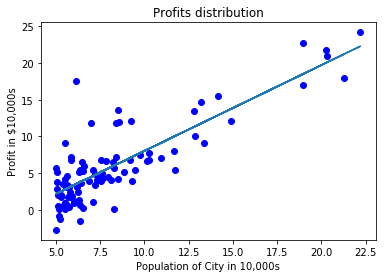

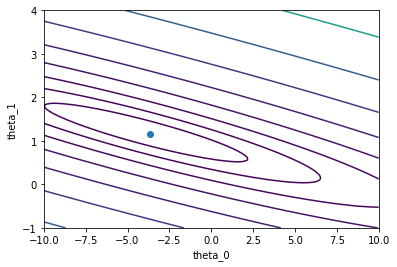

In [195]:
%matplotlib inline

from numpy import loadtxt, zeros, ones, array, linspace, logspace
from pylab import scatter, show, title, xlabel, ylabel, plot, contour, legend


#Evaluate the linear regression
def compute_cost(X, y, theta):
    '''
    Comput cost for linear regression
    '''
    #Number of training samples
    m = y.size

    predictions = X.dot(theta).flatten()

    sqErrors = (predictions - y) ** 2

    J = (1.0 / (2 * m)) * sqErrors.sum()

    return J


def gradient_descent(X, y, theta, alpha, num_iters):
    '''
    Performs gradient descent to learn theta
    by taking num_items gradient steps with learning
    rate alpha
    '''
    m = y.size
    J_history = zeros(shape=(num_iters, 1))

    for i in range(num_iters):

        predictions = X.dot(theta).flatten()

        errors_x1 = (predictions - y) * X[:, 0]
        errors_x2 = (predictions - y) * X[:, 1]

        theta[0][0] = theta[0][0] - alpha * (1.0 / m) * errors_x1.sum()
        theta[1][0] = theta[1][0] - alpha * (1.0 / m) * errors_x2.sum()

        J_history[i, 0] = compute_cost(X, y, theta)

    return theta, J_history


#Load the dataset
data = loadtxt('ex1data1.txt', delimiter=',')

#Plot the data
scatter(data[:, 0], data[:, 1], marker='o', c='b')
title('Profits distribution')
xlabel('Population of City in 10,000s')
ylabel('Profit in $10,000s')
#show()

X = data[:, 0]
y = data[:, 1]

#number of training samples
m = y.size

#Add a column of ones to X (interception data)
it = ones(shape=(m, 2))
it[:, 1] = X

#Initialize theta parameters
theta = zeros(shape=(2, 1))

#Some gradient descent settings
iterations = 1500
alpha = 0.01

#compute and display initial cost
print(compute_cost(it, y, theta))

theta, J_history = gradient_descent(it, y, theta, alpha, iterations)

print(theta)
#Predict values for population sizes of 35,000 and 70,000
predict1 = array([1, 3.5]).dot(theta).flatten()
print('For population = 35,000, we predict a profit of %f' % (predict1 * 10000))
predict2 = array([1, 7.0]).dot(theta).flatten()
print('For population = 70,000, we predict a profit of %f' % (predict2 * 10000))

#Plot the results
result = it.dot(theta).flatten()
plot(data[:, 0], result)
show()


#Grid over which we will calculate J
theta0_vals = linspace(-10, 10, 100)
theta1_vals = linspace(-1, 4, 100)


#initialize J_vals to a matrix of 0's
J_vals = zeros(shape=(theta0_vals.size, theta1_vals.size))

#Fill out J_vals
for t1, element in enumerate(theta0_vals):
    for t2, element2 in enumerate(theta1_vals):
        thetaT = zeros(shape=(2, 1))
        thetaT[0][0] = element
        thetaT[1][0] = element2
        J_vals[t1, t2] = compute_cost(it, y, thetaT)

#Contour plot
J_vals = J_vals.T
#Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
xlabel('theta_0')
ylabel('theta_1')
scatter(theta[0][0], theta[1][0])
show()

0.108555
[[ 0.00542292]
 [ 0.62182169]]
For population = 35,000, we predict a profit of 21817.988335
For population = 70,000, we predict a profit of 43581.747483


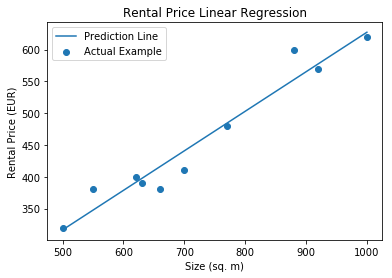

In [193]:



x = np.array([500,550,620,630,660,700,770,880,920,1000]) /1000
y = np.array([320,380,400,390,380,410,480,600,570,620]) /1000

#print(x)
#print(y)
#scatter(x, y, marker='o', c='b')
#number of training samples
m = y.size

#Add a column of ones to X (interception data)
it = ones(shape=(m, 2))
it[:, 1] = x

#Initialize theta parameters
theta = zeros(shape=(2, 1))

#Some gradient descent settings
iterations = 10000
alpha = 0.1

#compute and display initial cost
print(compute_cost(it, y, theta))

theta, J_history = gradient_descent(it, y, theta, alpha, iterations)

print(theta)
#Predict values for population sizes of 35,000 and 70,000
predict1 = array([1, 3.5]).dot(theta).flatten()
print('For population = 35,000, we predict a profit of %f' % (predict1 * 10000))
predict2 = array([1, 7.0]).dot(theta).flatten()
print('For population = 70,000, we predict a profit of %f' % (predict2 * 10000))

#Plot the results
x = np.array([500,550,620,630,660,700,770,880,920,1000])
y = np.array([320,380,400,390,380,410,480,600,570,620]) 
result = it.dot(theta).flatten() * 1000
scatter(x,y)
plot(x, result)
xlabel("Size (sq. m)")
ylabel("Rental Price (EUR)")
title("Rental Price Linear Regression")  
legend(['Prediction Line', 'Actual Example'])
show()

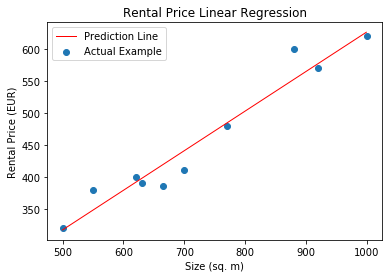

In [194]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

x = np.array([500,550,620,630,665,700,770,880,920,1000])
y = np.array([320,380,400,390,385,410,480,600,570,620])

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x, y)
y_pred = regr.predict(np.arange(500,1000).reshape(-1, 1))

#fig, ax = plt.subplots()
plt.scatter(x, y)
plt.plot(np.arange(500,1000), y_pred, color='red', linewidth=1)

#plt.set(xlabel='Size (sq. m)', ylabel='Rental Price (EUR)',title='Size vs Price')
plt.xlabel("Size (sq. m)")
plt.ylabel("Rental Price (EUR)")
plt.title("Rental Price Linear Regression")  
plt.legend(['Prediction Line', 'Actual Example'])
plt.show()



### Линейна регресия на много променливи

Когато искаме да включим повече от една променлива хипотезата придобива следният вид: 

$$h_\theta (x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 + \cdots + \theta_n x_n$$

В този случай ще се използваме следните означения:

$$\begin{align*}x_j^{(i)} &= \text{стойността на параметър } j \text{ в }i^{тия}\text{ обучаващ пример} \newline x^{(i)}& = \text{входящите параметри на }i^{тия}\text{ обучаващ пример} \newline m &= \text{брой обучващи примери} \newline n &= \text{брой параметри} \end{align*}$$

Ако използваме умножение на матрици хипотезата може да бъде записана по следният начин:
$$\begin{align*}h_\theta(x) =\begin{bmatrix}\theta_0 \hspace{2em} \theta_1 \hspace{2em} ... \hspace{2em} \theta_n\end{bmatrix}\begin{bmatrix}x_0 \newline x_1 \newline \vdots \newline x_n\end{bmatrix}= \theta^T x\end{align*}$$

За да може да използваме този запис въвеждаме изкуствен параметър: $x_{0}^{(i)} =1 \text{ където } i\in { 1,\dots, m } $

Градиентното спускане за множество входящи параметри ще изглежда така:

$$\begin{align*}& \text{повтаряй до достигане на минимум:} \; \lbrace \newline \; & \theta_j := \theta_j - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)} \; & \text{ където } j \in {0, \dots, n}\newline \rbrace\end{align*}$$
